# Parallel Coordinate Plot: Real Case Example -- Mean Climate

- Generate a static image of Parallel coordinate plot using Matplotlib, for mean climate metrics.
- Author: Jiwoo Lee (2021-07)
- Last update: 2021.08

## 1. Read data from JSON files

Input data for parallel coordinate plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np
import requests

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

mip = "cmip6"
exp = "historical"
data_version = "v20210811"
json_dir = './json_files'

os.makedirs(json_dir, exist_ok=True)

for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/archive_raw_json/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    r = requests.get(url, allow_redirects=True)
    filename = os.path.join(json_dir, url.split('/')[-1])
    with open(filename, 'wb') as file:
        file.write(r.content)
    print('Download completed:', filename)

Download completed: ./json_files/pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rstcre.cmip6.histor

Uncompress PMP output archive file

Check JSON files

In [3]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20210811.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20210811.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20210811.json
tas.cmip6.historical.regrid2.2p5x2p5.v20210811.json
tauu.cmip6.historical.regrid2.2p5x

### 1.2 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON.  Optional
- `regions`: list of string, where each element is region to extract from the JSON.  Optional
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [4]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

df_dict, var_list, var_unit_list, regions, stats = read_mean_clim_json_files(
    json_list, mip=mip)

In [5]:
print('var_list:', var_list)
print('var_unit_list:', var_unit_list)
print("len(var_list:", len(var_list))
print('regions:', regions)
print('stats:', stats)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list: ['pr [N/A]', 'prw [N/A]', 'psl [N/A]', 'rlds [N/A]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlut [N/A]', 'rlutcs [N/A]', 'rsds [N/A]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsutcs [N/A]', 'sfcWind [N/A]', 'ta-200 [N/A]', 'ta-850 [N/A]', 'tas [N/A]', 'tauu [N/A]', 'ts [N/A]', 'ua-200 [N/A]', 'ua-850 [N/A]', 'va-200 [N/A]', 'va-850 [N/A]', 'zg-500 [N/A]']
len(var_list: 25
regions: ['NHEX_ocean', 'NHEX', 'SHEX_ocean', 'global', 'ocean', 'ocean_50S50N', 'NHEX_land', 'land', 'SHEX', 'TROPICS', 'SHEX_land']
stats: ['bias_xy', 'cor_xy', 'mae_xy', 'mean-obs_xy', 'mean_xy', 'rms_devzm', 'rms_xy', 'rms_xyt', 'rms_y', 'rmsc_xy', 'std-obs_xy', 'std-obs_xy_devzm', 'std-obs_xyt', 'std_xy', 'std_xy_devzm', 'std_xyt']


In [6]:
df_dict['rms_xyt']['ann']['global']

,mip,model,run,model_run,pr,prw,psl,rlds,rltcre,rlus,...,ta-200,ta-850,tas,tauu,ts,ua-200,ua-850,va-200,va-850,zg-500
0,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.940,144.959,267.932,13.526,9.535,10.853,...,2.810,1.665,2.242,0.038,2.382,5.026,1.564,2.107,0.982,27.055
1,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.909,145.068,264.098,10.948,8.175,10.430,...,2.413,1.341,1.935,0.036,2.051,4.492,1.621,2.155,1.006,27.817
2,cmip6,AWI-CM-1-1-MR,r1i1p1,AWI-CM-1-1-MR_r1i1p1,1.756,145.155,225.214,11.131,8.488,8.575,...,2.052,1.184,1.426,0.029,1.567,3.302,1.427,1.995,0.890,21.264
3,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,2.015,145.183,251.179,14.476,9.695,12.183,...,3.784,2.118,1.918,0.034,2.220,4.450,1.826,2.310,1.062,NaN
4,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.862,145.174,320.011,13.630,8.172,11.377,...,NaN,NaN,2.525,0.037,2.347,NaN,NaN,NaN,NaN,NaN
5,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.778,145.112,262.148,14.081,9.055,12.360,...,4.105,1.973,2.874,0.039,2.752,4.567,1.997,2.125,1.203,NaN
6,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.870,145.367,225.509,17.983,8.321,13.176,...,NaN,NaN,2.666,NaN,2.973,NaN,NaN,NaN,NaN,NaN
7,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.444,145.101,264.854,10.955,7.380,10.010,...,2.056,1.450,1.502,0.082,1.798,4.168,1.665,2.081,0.970,NaN
8,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.600,145.069,268.522,12.595,8.411,10.700,...,2.839,2.042,1.857,0.082,2.093,4.166,2.101,2.216,1.078,NaN
9,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.393,145.056,254.148,10.749,7.236,9.762,...,NaN,NaN,1.541,0.081,1.794,3.903,1.634,1.980,0.939,NaN


In [7]:
# Simple re-order variables
if 'zg-500' in var_list and 'sfcWind' in var_list:
    var_list.remove('zg-500')
    idx_sfcWind = var_list.index('sfcWind')
    var_list.insert(idx_sfcWind+1, 'zg-500')
    
if 'ta-850' in var_list:
    var_list.remove('ta-850')

print("var_list:", var_list)
print("len(var_list:", len(var_list))

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850']
len(var_list: 24


In [8]:
data = df_dict['rms_xyt']['ann']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
#metric_names = ['\n['.join(var_unit.split(' [')) for var_unit in var_unit_list]
metric_names = var_list
model_highlights = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (45, 24)
len(metric_names):  24
len(model_names):  45


In [9]:
units_all = 'prw [kg m-2], pr [mm d-1], psl [Pa], rlds [W m-2], rsdscs [W m-2], rltcre [W m-2], rlus [W m-2], rlut [W m-2], rlutcs [W m-2], rsds [W m-2], rsdt [W m-2], rstcre [W m-2], rsus [W m-2], rsut [W m-2], rsutcs [W m-2], sfcWind [m s-1], zg-500 [m], ta-200 [K], ta-850 [K], tas [K], ts [K], ua-200 [m s-1], ua-850 [m s-1], uas [m s-1], va-200 [m s-1], va-850 [m s-1], vas [m s-1], tauu [Pa]'
units_all.split(', ')
var_unit_list = [] 

for var in var_list:
    found = False
    for var_units in units_all.split(', '):
        tmp1 = var_units.split(' [')[0]
        #print(var, tmp1)
        if tmp1 == var:
            unit = '[' + var_units.split(' [')[1]
            var_unit_list.append(var + '\n' + unit)
            found = True
            break
    if found is False:
        print(var, 'not found')

print('var_unit_list:', var_unit_list)

metric_names = var_unit_list

var_unit_list: ['pr\n[mm d-1]', 'prw\n[kg m-2]', 'psl\n[Pa]', 'rlds\n[W m-2]', 'rltcre\n[W m-2]', 'rlus\n[W m-2]', 'rlut\n[W m-2]', 'rlutcs\n[W m-2]', 'rsds\n[W m-2]', 'rsdscs\n[W m-2]', 'rsdt\n[W m-2]', 'rstcre\n[W m-2]', 'rsut\n[W m-2]', 'rsutcs\n[W m-2]', 'sfcWind\n[m s-1]', 'zg-500\n[m]', 'ta-200\n[K]', 'tas\n[K]', 'tauu\n[Pa]', 'ts\n[K]', 'ua-200\n[m s-1]', 'ua-850\n[m s-1]', 'va-200\n[m s-1]', 'va-850\n[m s-1]']


In [10]:
df_dict['rms_xyt']['ann']['global'][var_list].columns

Index(['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds',
       'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'zg-500',
       'ta-200', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850'],
      dtype='object')

## 2. Plot

In [11]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

Passed a quick QC


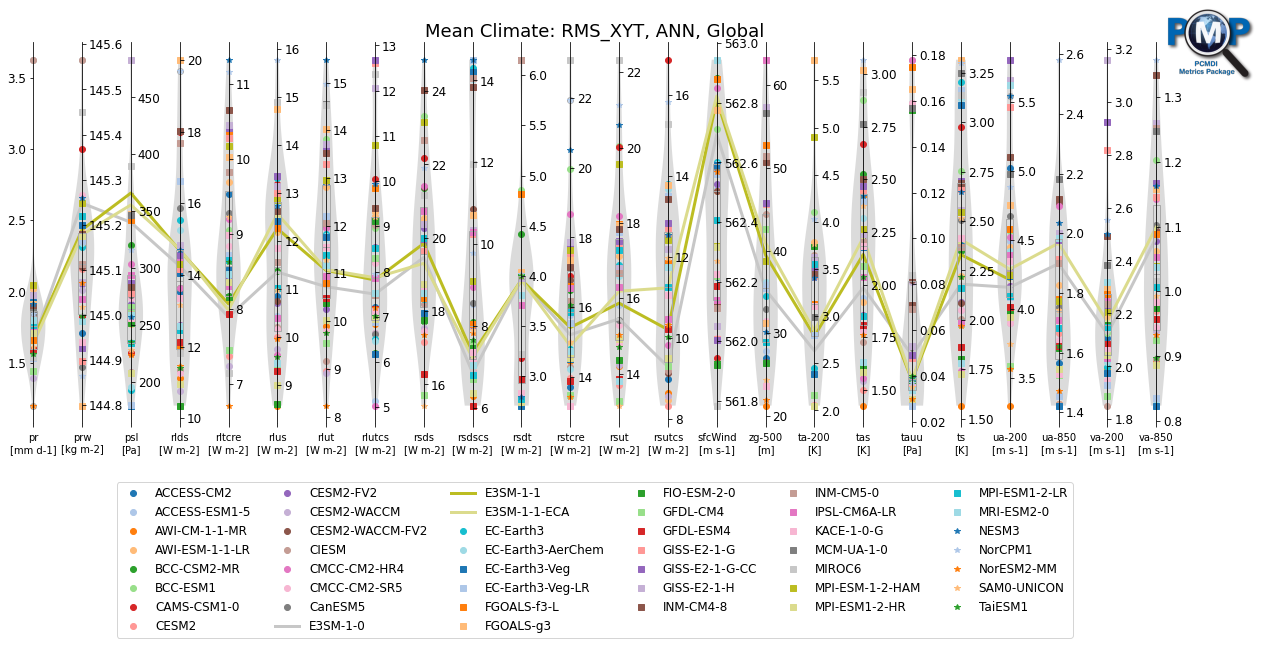

In [12]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])
#fig.text(0.99, -0.45, 'Data version\n'+data_version, transform=ax.transAxes,
#         fontsize=12, color='black', alpha=0.6, ha='right', va='bottom',)

In [13]:
# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_'+data_version+'.png', facecolor='w', bbox_inches='tight')

In [14]:
# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.6,
        ha='center', va='center', rotation='0')

# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_example.png', facecolor='w', bbox_inches='tight')